# GP Functional test

- INPUT accepts gp functional data
- OUTPUT requested functional values

## Functional values

[comment]: ![requirements.jpg](attachment:functional-limit-values.jpg)

<div>
<img src="attachment:functional-limit-values.jpg" width="400"/>
</div>

t_1000°C[s]
T_60s[°C]
I_100ms[A]
I_60s[A] Status

## Voltage Profile

| t[s]  | U[V] |
| ----- | ---- |
| 1,9   | 11 V |
| 58,1  | 4,4  |

## File Input Structure

| t[s]  | U[V]   | I[A]  | Piro[°C] |
| ----- | ------ | ----- | -------- |
| 0,000 | -0,084 | 0,146 | 897,951  |
| 0,010 | -0,084 | 0,148 | 897,943  |
| 0,020 | -0,075 | 0,150 | 897,928  |

## File Output Structure

| DUT        | t_1000°C[s]  | T_60s[°C] | I_100ms[A] | I_60s[A] |
| ---------- | ------------ | --------- | ---------- |--------- |
| gp-data-1  |     6.98     |  1027.22  |    23.04   |   6.70   |
| gp-data-2  |     6.60     |  1025.10  |    21.00   |   6.60   |




## Imports

In [9]:
# Imports
import os
import csv
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

## Defines

In [10]:
DEBUG = True
#DEBUG = False

# set path of this file
NOTEBOOK = os.path.abspath("GlowPlug-Graph.ipynb")

INPUT_FILEPATH = os.path.join(os.path.dirname(NOTEBOOK), "gp-data-1.txt")

#INPUT_FILENAME = "1.txt"
#INPUT_DIRECTORY = "E:\GP-functional-python\data"
#INPUT_FILEPATH = os.path.join(INPUT_DIRECTORY, INPUT_FILENAME)

SAMPLE_FREQ = 100 # 100 hz timestamp data

results = []

## import_data()

In [11]:
def import_data():
    """Read txt file"""
    global column_t
    global column_U
    global column_I
    global column_T
    
    with open(INPUT_FILEPATH) as f:
        gp_reader = csv.reader(f, delimiter='\t')
        data = list(gp_reader)
        header = data[0]

        for i,rows in enumerate(data[1:]):
            for j,parsed_item in enumerate(rows):
                parsed_item = parsed_item.replace(',', '.') # Change rows to parsed_item
                data[i+1][j] = parsed_item

    #data[1:]
    data = np.array(data[1:], dtype=np.float)

    # izbira stolpca [vse vrstice= ,: 0 = prvi stolpec]
    column_t = data[:,0]
    column_U = data[:,1]
    column_I = data[:,2]
    column_T = data[:,3]

## analyse_data()

In [12]:
def analyse_data():
    """check all important parameters"""    
    global column_t
    global column_U
    global column_I
    global column_T
    
    global results
    results.clear()
    #-------------------------
    # GET DUT name - filename
    results.append(INPUT_FILEPATH)

    if(DEBUG):
        print("Filename:", INPUT_FILEPATH,"\n")
        #print("\n")

    #1. get index of voltage trigger. trigger when above 5V volts
    U_start_index = np.where(column_U >= 5)[0][0]
    index = U_start_index

    if(DEBUG):
        print("U_start_index:", index)
        print(column_t[index],"[s]" ,column_U[index],"[V]",column_I[index],"[A]",column_T[index],"[°C]")
        print("\n")
        #print("\n")

    #-------------------------
    # Calculate t_1000°C[s]
    # get first index of temperature above or equal to 1000C
    index = np.where(column_T >= 1000)[0][0]
    parameter = column_t[index]
    temperature = column_T[index]
    parameter = "{0:.2f}".format(parameter)
    results.append(parameter)

    if(DEBUG):
        print("t_1000°C:",  parameter,"[s]" ,"index:", index)
        print(column_t[index],"[s]" ,column_U[index],"[V]",column_I[index],"[A]",column_T[index],"[°C]")
        print("\n")
    #-------------------------
    # T_60s[°C]
    index = 60*SAMPLE_FREQ + U_start_index
    index = int(index)
    parameter = column_T[index]
    parameter = "{0:.2f}".format(parameter)
    results.append(str(parameter))

    if(DEBUG):
        print("T_60s:",  parameter,"[°C]" ,"index:", index)
        print(column_t[index],"[s]" ,column_U[index],"[V]",column_I[index],"[A]",column_T[index],"[°C]")
        print("\n")

    #-------------------------
    # I_100ms[A]
    index = 0.1*SAMPLE_FREQ + U_start_index
    index = int(index)
    parameter = column_I[index]
    parameter = "{0:.2f}".format(parameter)
    results.append(str(parameter))

    if(DEBUG):
        print("I_100ms:",  parameter,"[A]" ,"index:", index)
        print(column_t[index],"[s]" ,column_U[index],"[V]",column_I[index],"[A]",column_T[index],"[°C]")
        print("\n")

    #-------------------------
    # I_60s[A]
    index = 60*SAMPLE_FREQ + U_start_index-5
    parameter = column_I[index]
    #print(parameter)
    parameter = "{0:.2f}".format(parameter)
    results.append(str(parameter))

    if(DEBUG):
        print("I_60s:",  parameter,"[A]" ,"index:", index)
        print(column_t[index],"[s]" ,column_U[index],"[V]",column_I[index],"[A]",column_T[index],"[°C]")
        print("\n")

## graph_data()

In [13]:
def graph_data():
    %matplotlib inline

    fig, ax1 = plt.subplots()

    # create second axis
    ax2 = ax1.twinx()

    # write data to plot
    ax1.plot(column_t, column_U, label="U[V]",color='black')
    ax1.plot(column_t, column_I, label="I[A]",color='blue')
    ax2.plot(column_t, column_T, label="T[C]",color='red')

    # set labels
    ax1.set_xlabel('Time[s]')
    ax1.set_ylabel('Voltage, Current    [U,I]', color='blue')
    ax2.set_ylabel('Temp    [T]', color='red')

    # set plot linmits
    plt.xlim(0, np.size(column_t)/SAMPLE_FREQ)
    #plt.ylim(0, 5)

    # show everything
    plt.show()

## export_data()

In [14]:
def export_data():
    global results
    
    with open("functional_glowing_stat.txt","a+") as f:
        result_str =  str(results).strip('[]')
        f.write(result_str + '\n')
        #f.write("\n")

    if(DEBUG):
        print(result_str)

## main()

In [15]:
def main():

    import_data()
    analyse_data()
    graph_data()
    export_data()

## Run Application

Filename: C:\Users\crtjur\Desktop\jupyter-notebooks.git\psg-functional-test\gp-data-1.txt 

U_start_index: 502
5.02 [s] 9.956 [V] 4.135 [A] 700.056 [°C]


t_1000°C: 6.98 [s] index: 698
6.98 [s] 4.305 [V] 8.199 [A] 1003.066 [°C]


T_60s: 1027.22 [°C] index: 6502
65.02 [s] 1.774 [V] 4.596 [A] 1027.223 [°C]


I_100ms: 23.04 [A] index: 512
5.12 [s] 11.03 [V] 23.041 [A] 700.125 [°C]


I_60s: 6.70 [A] index: 6497
64.97 [s] 4.321 [V] 6.698 [A] 1027.243 [°C]




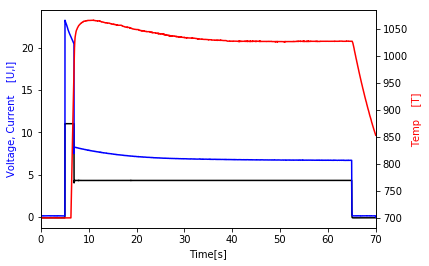

'C:\\Users\\crtjur\\Desktop\\jupyter-notebooks.git\\psg-functional-test\\gp-data-1.txt', '6.98', '1027.22', '23.04', '6.70'


In [16]:
if __name__ == "__main__":
    main()